<a href="https://colab.research.google.com/github/mehmetcan0/GlobalAI_Project_UrbanSOunds/blob/main/preprocessing_project_urban.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/spectro.zip' -d "/content/drive/MyDrive/"


Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: /content/drive/MyDrive/spectrograms/0/177729-0-0-40.png  
  inflating: /content/drive/MyDrive/spectrograms/0/177729-0-0-38.png  
  inflating: /content/drive/MyDrive/spectrograms/5/23219-5-0-11.png  
  inflating: /content/drive/MyDrive/spectrograms/0/177729-0-0-3.png  
  inflating: /content/drive/MyDrive/spectrograms/5/23219-5-0-0.png  
  inflating: /content/drive/MyDrive/spectrograms/0/177729-0-0-42.png  
  inflating: /content/drive/MyDrive/spectrograms/5/21187-5-0-0.png  
  inflating: /content/drive/MyDrive/spectrograms/0/177729-0-0-111.png  
  inflating: /content/drive/MyDrive/spectrograms/5/23219-5-0-1.png  
  inflating: /content/drive/MyDrive/spectrograms/5/209992-5-4-3.png  
  inflating: /content/drive/MyDrive/spectrograms/5/209992-5-3-6.png  
  inflating: /content/drive/MyDrive/spectrograms/5/209992-5-4-17.png  
  inflating: /content/drive/MyDrive/spectrograms/5/22882-5-0-1.png  
  inflating: /content/drive/MyDrive/spect

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import cv2
import os

In [ ]:
path = '/content/drive/MyDrive/spectrograms'



In [ ]:
%%time

X_data = []
y_data = []

for subdir, dirs, files in os.walk(path):
    for file in files:
        pic = cv2.imread(os.path.join(subdir, file))
        pic = cv2.cvtColor(pic, cv2.COLOR_BGR2GRAY)
        pic = cv2.resize(pic, (64, 64))
        
        X_data.append(pic)
        y_data.append(int(subdir[-1]))

X = np.array(X_data) / 255
y = np.array(y_data).reshape(-1, 1)

print(X.shape)
print(y.shape)

(8732, 64, 64)
(8732, 1)
CPU times: user 40.9 s, sys: 6.97 s, total: 47.9 s
Wall time: 1min 15s


In [ ]:
print(X[5:9])
print(y[5:9])

[[[0.97647059 0.         0.         ... 0.         0.         0.        ]
  [0.97647059 0.         0.         ... 0.         0.         0.        ]
  [0.97647059 0.         0.         ... 0.         0.         0.        ]
  ...
  [0.97647059 0.         0.         ... 0.         0.         0.        ]
  [0.97647059 0.         0.         ... 0.         0.         0.        ]
  [0.99607843 0.97647059 0.97647059 ... 0.97647059 0.97647059 0.97647059]]

 [[0.97647059 0.         0.         ... 0.         0.         0.        ]
  [0.97647059 0.         0.         ... 0.         0.         0.        ]
  [0.97647059 0.         0.         ... 0.         0.         0.        ]
  ...
  [0.97647059 0.37254902 0.47843137 ... 0.39607843 0.33333333 0.41568627]
  [0.97647059 0.34509804 0.17254902 ... 0.10196078 0.01960784 0.03529412]
  [0.99607843 0.97647059 0.97647059 ... 0.97647059 0.97647059 0.97647059]]

 [[0.97647059 0.         0.         ... 0.         0.         0.        ]
  [0.97647059 0.      

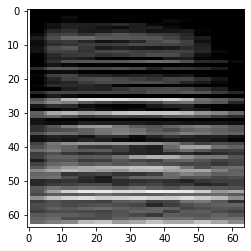

(64, 64)


In [ ]:
plt.imshow(X[8731],cmap="gray")
plt.show()

print(X[8731].shape)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.2)

print(f"X_train: {len(X_train)}")
print(f"y_train: {len(y_train)}")

print(f"X_val: {len(X_val)}")
print(f"y_val: {len(y_val)}")

print(f"X_test: {len(X_test)}")
print(f"y_test: {len(y_test)}")

X_train: 6985
y_train: 6985
X_val: 1397
y_val: 1397
X_test: 350
y_test: 350


In [ ]:
pathnew= '/content/drive/MyDrive'

np.save(os.path.join(pathnew,'X_train'), X_train)
np.save(os.path.join(pathnew,'y_train'), y_train)

np.save(os.path.join(pathnew,'X_val'), X_val)
np.save(os.path.join(pathnew,'y_val'), y_val)

np.save(os.path.join(pathnew,'X_test'), X_test)
np.save(os.path.join(pathnew,'y_test'), y_test)